In [1]:

%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install scikit-learn

import pandas as pd
import numpy as np
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os
import csv
import tensorflow as tf
from tensorflow.keras import layers, Model




  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 30.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 54.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 60.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 4.8 MB/s eta 0:00:00a 0:00:01m
Using cached protob

### Read datasets
Use the gzip function is files ar gzipped

In [2]:
def read_ds_gzip(path: Optional[Path]=None, ds: str = "TRAIN") -> pd.DataFrame:
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with gzip.open(f'/kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

def read_ds(path: Optional[Path]=None, ds: str = "TRAIN"):
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with open(f'/kaggle/input/train-sc2-keystrokes/{ds}.CSV' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

In [7]:
df_train = read_ds_gzip(Path(os.path.abspath('')) / "/Users/suyikang/Documents/School/5IF/Rage against the ML/data_mining/in-star-craft-2-player/TRAIN.CSV.GZ")
df_train.shape, df_train.head()

((3052, 10539),
                                         battleneturl played_race     0     1  \
 0  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
 1  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss     s  Base   
 2  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
 3  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss  Base     s   
 4  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
 
    2     3     4  5         6         7  ... 10527 10528 10529 10530 10531  \
 0  s     s     s  s        t5      Base  ...   NaN   NaN   NaN   NaN   NaN   
 1  s     s  Base  s         s      Base  ...   NaN   NaN   NaN   NaN   NaN   
 2  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   
 3  s  Base     s  s         s        t5  ...   NaN   NaN   NaN   NaN   NaN   
 4  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   
 
   10532 10533 10534

In [8]:
print(df_train.info())  # Affiche des informations sur le DataFrame
print(df_train.describe())  # Fournit des statistiques descriptives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Columns: 10539 entries, battleneturl to 10536
dtypes: object(10539)
memory usage: 245.4+ MB
None
                                             battleneturl played_race     0  \
count                                                3052        3052  3044   
unique                                                200           3     4   
top     http://kr.battle.net/sc2/en/profile/2348639/1/...     Protoss     s   
freq                                                   58        1210  1839   

           1     2     3     4     5     6     7  ...     10527     10528  \
count   3044  3044  3044  3044  3044  3043  3042  ...         1         1   
unique    10    17    22    28    27    29    32  ...         1         1   
top        s     s     s     s     s     s     s  ...  hotkey22  hotkey12   
freq    2757  2569  1770  1610  1174  1046   888  ...         1         1   

           10529     10530     10531     10532 

In [9]:
print(df_train.head())
print("---------------------------------------------------")
print(df_train.loc[0, 'battleneturl'])

                                        battleneturl played_race     0     1  \
0  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
1  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss     s  Base   
2  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
3  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss  Base     s   
4  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   

   2     3     4  5         6         7  ... 10527 10528 10529 10530 10531  \
0  s     s     s  s        t5      Base  ...   NaN   NaN   NaN   NaN   NaN   
1  s     s  Base  s         s      Base  ...   NaN   NaN   NaN   NaN   NaN   
2  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   
3  s  Base     s  s         s        t5  ...   NaN   NaN   NaN   NaN   NaN   
4  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   

  10532 10533 10534 10535 10536  
0   NaN   NaN   

In [3]:
df_test = read_ds_gzip(Path(os.path.abspath('')) / "/Users/suyikang/Documents/School/5IF/Rage against the ML/data_mining/in-star-craft-2-player/TEST.CSV.GZ", "TEST")
print(df_test.shape) 
print(df_test.head())
print("----------------------------------------------------------------------")
print(df_test.info())
print(df_test.describe())

(340, 6818)
  played_race     0         1         2         3         4         5  \
0        Zerg     s         s         s  hotkey10         s  hotkey60   
1      Terran     s  hotkey30  hotkey00        t5         s  hotkey32   
2     Protoss  Base         s         s      Base         s  hotkey20   
3        Zerg     s         s         s         s  hotkey20         s   
4     Protoss  Base         s         s      Base         s  hotkey50   

          6         7         8  ... 6807 6808 6809 6810 6811 6812 6813 6814  \
0         s  hotkey00         s  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1         s  hotkey32         s  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  hotkey30  hotkey60  hotkey40  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  hotkey40        t5       t10  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  hotkey30        t5  hotkey40  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

  6815 6816  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN 

### Data observation for df_train

High Dimensionality: 10,539 columns (mostly sparse action data)

Sparse Values: Many NaN in later columns (e.g., 10527+)

Mixed Data Types:

battleneturl: User identifier (target variable)

played_race: Categorical feature (Protoss/Zerg/Terran)

Columns 0-10536: sequential in-game actions & timestamps

In [4]:

%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def format_data(df):
    # 1. Encode Target
    user_encoder = LabelEncoder()
    df['user_id'] = user_encoder.fit_transform(df['battleneturl'])
    
    # 2. Process Race
    race_encoder = OneHotEncoder()
    race_encoded = race_encoder.fit_transform(df[['played_race']])
    
    # 3. Process Action Sequence
    action_columns = df.columns[2:-1]  # Exclude URL and user_id
    
    # Convert to 3D tensor: (samples, time_steps, features)
    sequences = []
    for _, row in df.iterrows():
        seq = []
        for col in action_columns:
            action = row[col]
            # Extract timestamp from action if present
            if pd.isna(action):
                time = 0
                action_type = 'no_action'
            elif action.startswith('t'):
                time = int(action[1:])
                action_type = 'time_marker'
            else:
                time = 0
                action_type = action
            seq.append([time, action_type])
        sequences.append(seq)
    
    # Convert to numpy array
    sequences = np.array(sequences)
    
    # 4. Split into time and action features
    time_features = sequences[:, :, 0].astype(float)
    action_features = sequences[:, :, 1]
    
    # 5. Encode actions
    action_encoder = LabelEncoder()
    flat_actions = action_features.flatten()
    action_encoder.fit(flat_actions)
    encoded_actions = action_encoder.transform(flat_actions).reshape(action_features.shape)
    
    # 6. Combine with race data
    full_data = {
        'user_id': df['user_id'],
        'race': race_encoded.toarray(),
        'time_features': time_features,
        'action_sequence': encoded_actions
    }
    
    return full_data

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 53.0 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 61.9 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:

import tensorflow as tf
from tensorflow.keras import layers, Model

def build_model(time_steps, n_actions, n_races, n_users):
    # Input for action sequence
    action_input = layers.Input(shape=(None,), name='action_input')
    
    # Add masking layer instead of NotEqual
    masked_input = layers.Masking(mask_value=0)(action_input)
    
    # Embedding layer
    action_emb = layers.Embedding(n_actions, 64)(masked_input)
    
    # Bidirectional LSTM for sequence processing
    lstm = layers.Bidirectional(
        layers.LSTM(128, return_sequences=True)
    )(action_emb)
    
    # Input for race
    race_input = layers.Input(shape=(1,), name='race_input')
    race_emb = layers.Embedding(n_races, 8)(race_input)
    race_flat = layers.Flatten()(race_emb)
    
    # Global pooling for sequence
    sequence_features = layers.GlobalMaxPooling1D()(lstm)
    
    # Combine features
    combined = layers.Concatenate()([sequence_features, race_flat])
    
    # Output layer
    output = layers.Dense(n_users, activation='softmax')(combined)
    
    return Model(
        inputs=[action_input, race_input],
        outputs=output
    )


In [35]:
formatted = format_data(df_train)


# Normalize time features
time_data = (formatted['time_features'] - 5) / (df_train.shape[1]-2)*5  # Scale to [0,1]

# Split data
X = {
    'time_input': time_data[..., np.newaxis],
    'action_input': formatted['action_sequence'],
    'race_input': formatted['race']
}
y = formatted['user_id']


In [33]:
print("Race data shape:", formatted['race'].shape)
print("Race data type:", type(formatted['race']))
print("First few race encodings:", formatted['race'][:5])

Race data shape: (3052, 3)
Race data type: <class 'numpy.ndarray'>
First few race encodings: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [34]:
formatted = format_data(df_train)

# Create model with correct dimensions
model = build_model(
    time_steps=None,  # Variable length sequences
    n_actions=len(np.unique(formatted['action_sequence'])),
    n_races=3,  # From your race data shape
    n_users=len(np.unique(formatted['user_id']))
)

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'NotEqual'

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ action_input        │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 64)  │    674,368 │ action_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ action_input[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ race_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, None, 256) │    197,632 │ embedding_2[0][0… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 8)      │         24 │ race_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ bidirectional[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 264)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 200)       │     53,000 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 925,024 (3.53 MB)

 Trainable params: 925,024 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Remove duplicate compile call
# Add tqdm for progress tracking
%pip install tqdm
from tqdm.notebook import tqdm
import time

class TrainingStatus(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.pbar = tqdm(total=self.params['epochs'], desc='Training')
        
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
        
    def on_epoch_end(self, epoch, logs={}):
        time_taken = time.time() - self.epoch_time_start
        self.pbar.set_postfix({
            'loss': f"{logs['loss']:.4f}",
            'acc': f"{logs['accuracy']:.4f}",
            'val_loss': f"{logs['val_loss']:.4f}", 
            'val_acc': f"{logs['val_accuracy']:.4f}",
            'time': f"{time_taken:.2f}s"
        })
        self.pbar.update(1)
        
    def on_train_end(self, logs={}):
        self.pbar.close()

model.fit(
    X, y,
    epochs=10, 
    batch_size=32,
    validation_split=0.2,
    callbacks=[TrainingStatus()],
    verbose=0  # Set to 0 since we're using tqdm
)

Note: you may need to restart the kernel to use updated packages.


Training:   0%|          | 0/10 [00:00<?, ?it/s]

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 264, but received input with shape (None, 280)[0m

Arguments received by Functional.call():
  • inputs={'time_input': 'tf.Tensor(shape=(None, 10537, 1), dtype=float32)', 'action_input': 'tf.Tensor(shape=(None, 10537), dtype=int64)', 'race_input': 'tf.Tensor(shape=(None, 3), dtype=float32)'}
  • training=True
  • mask={'time_input': 'None', 'action_input': 'None', 'race_input': 'None'}

### Format data

In [13]:
def format_train(df):
    # Extract columns into lists
    profile = df['battleneturl'].tolist()
    avatar = df['played_race'].tolist()
    
    # Get all columns except battleneturl and played_race
    moves = df.iloc[:, 2:].values.tolist()
    
    # Create dictionary with the extracted data
    sc2_dict = {'Profile': profile,    # Player profile URLs
                'Avatar': avatar,      # Player races/avatars 
                'Moves': moves}        # Lists of player moves/actions
                
    return pd.DataFrame(sc2_dict)

def format_test(df):
    # Extract columns into lists
    avatar = df['played_race'].tolist()
    
    # Get all columns except played_race
    moves = df.iloc[:, 1:].values.tolist()
    
    # Create dictionary with the extracted data
    sc2_dict = {'Avatar': avatar, 'Moves': moves}
    return pd.DataFrame(sc2_dict)


In [16]:
df_train = format_train(features_train)
print(df_train.head())
print("----------------------------------------------------------------------")
df_test = format_test(features_test)
print(df_test.head())

                                             Profile   Avatar  \
0  http://eu.battle.net/sc2/en/profile/4234852/1/...  Protoss   
1  http://eu.battle.net/sc2/en/profile/3074362/1/...  Protoss   
2  http://eu.battle.net/sc2/en/profile/4234852/1/...  Protoss   
3  http://eu.battle.net/sc2/en/profile/3074362/1/...  Protoss   
4  http://eu.battle.net/sc2/en/profile/4234852/1/...  Protoss   

                                               Moves  
0  [Base, s, s, s, s, s, t5, Base, s, hotkey30, h...  
1  [s, Base, s, s, Base, s, s, Base, s, t5, hotke...  
2  [Base, s, s, s, Base, s, hotkey30, hotkey00, t...  
3  [Base, s, s, Base, s, s, s, t5, Base, s, hotke...  
4  [Base, s, s, s, Base, s, hotkey30, hotkey00, t...  
----------------------------------------------------------------------
    Avatar                                              Moves
0     Zerg  [s, s, s, hotkey10, s, hotkey60, s, hotkey00, ...
1   Terran  [s, hotkey30, hotkey00, t5, s, hotkey32, s, ho...
2  Protoss  [Base, s, 

### Reading stats of the dataset

In [21]:
def get_unique_ops(df):
    ops = df["Moves"]
    # If the first string is not a t
    unique_ops = set()
    for moves_list in ops:
        # Each move in the moves_list
        for move in moves_list:
            # Check if it's a valid move (string and not timestamp)
            if isinstance(move, str) and not move.startswith('t'):
                unique_ops.add(move)
                
    return unique_ops
        

In [23]:
unique_ops = sorted(list(get_unique_ops(df_train)))
print(unique_ops)
print("Number of unique operations: ", len(unique_ops))


['Base', 'SingleMineral', 'hotkey00', 'hotkey01', 'hotkey02', 'hotkey10', 'hotkey11', 'hotkey12', 'hotkey20', 'hotkey21', 'hotkey22', 'hotkey30', 'hotkey31', 'hotkey32', 'hotkey40', 'hotkey41', 'hotkey42', 'hotkey50', 'hotkey51', 'hotkey52', 'hotkey60', 'hotkey61', 'hotkey62', 'hotkey70', 'hotkey71', 'hotkey72', 'hotkey80', 'hotkey81', 'hotkey82', 'hotkey90', 'hotkey91', 'hotkey92', 's']
Number of unique operations:  33


### Dependent Variable
Our dependent variable is a categorical string; we can convert it to categories codes (number) with pd.Categorical

pd.Categorical doesn't directly modify the battleneturl to a number, instead it adds a cat.codes attribute to it. We can create a little function to convert the dependent variable from string to its category ID:

In [31]:
def to_categories(df: pd.DataFrame, col: str="Profile") -> dict:
    """Convert col of df to a categorical column"""
    # Convert the specified column to categorical type
    # This allows pandas to efficiently store repeated strings as integers
    df["Profile"] = pd.Categorical(df["Profile"])
    
    # Create a mapping dictionary from integer codes to original URL strings
    # enumerate() pairs each URL with an index number (0,1,2,...)
    # This lets us convert back to URLs later if needed
    code_to_url = dict(enumerate(df[col].cat.categories))
    
    # Replace the URL strings with their integer category codes
    # apply() transforms each value using cat.codes to get the integer
    df[[col]] = df[[col]].apply(lambda x: x.cat.codes)
    
    # Return the mapping dictionary for reference
    return code_to_url


In [32]:
my_features_train = df_train.copy()
my_dict = to_categories(my_features_train)
print(my_dict[53])
print(my_dict.keys())


http://eu.battle.net/sc2/en/profile/4234852/1/First/
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])


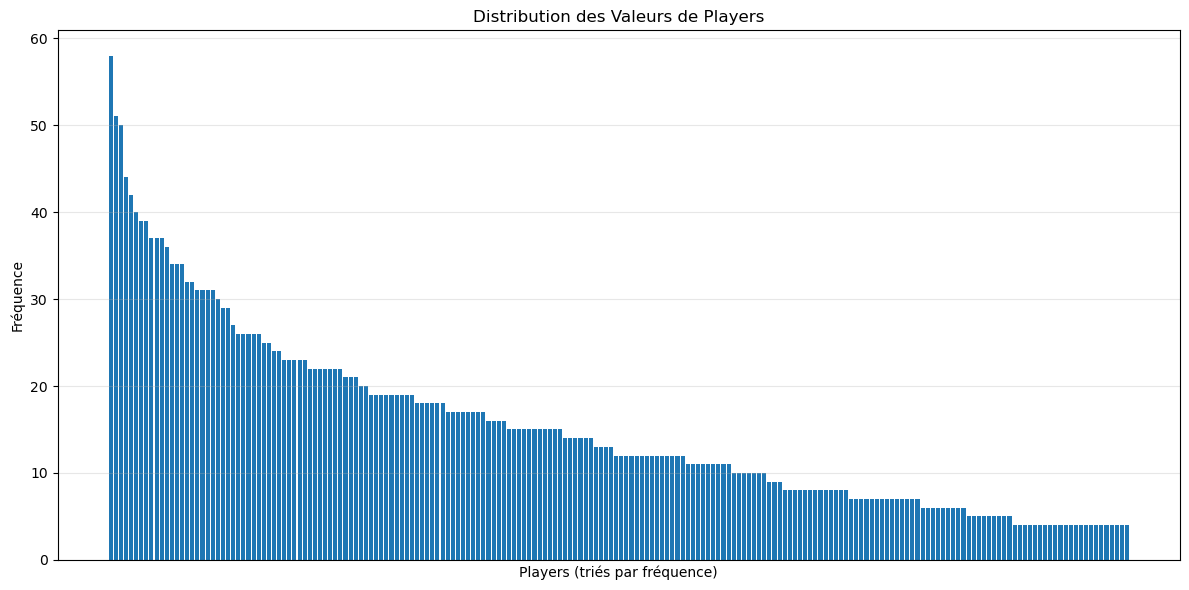


Statistiques des valeurs de players:
count    200.00000
mean      15.26000
std       10.41464
min        4.00000
25%        7.00000
50%       12.00000
75%       20.00000
max       58.00000
Name: count, dtype: float64

Top 10 players les plus fréquents:
Profile
http://kr.battle.net/sc2/en/profile/2348639/1/ParalyzE/    58
http://kr.battle.net/sc2/en/profile/2342419/1/soO/         51
http://kr.battle.net/sc2/en/profile/2341467/1/Classic/     50
http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/    44
http://kr.battle.net/sc2/en/profile/2332264/1/Zest/        42
http://kr.battle.net/sc2/en/profile/2344987/1/Life/        40
http://kr.battle.net/sc2/en/profile/2344031/1/Cure/        39
http://kr.battle.net/sc2/en/profile/2343479/1/True/        39
http://eu.battle.net/sc2/en/profile/2898004/1/MMA/         37
http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/    37
Name: count, dtype: int64


In [47]:
## Distribution des timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire tous les players et compter leur fréquence
all_players = df_train['Profile'].value_counts()

# Créer le graphique de distribution
plt.figure(figsize=(12, 6))

# Plot bar chart with players on x-axis
plt.bar(range(len(all_players)), all_players.values)

plt.title('Distribution des Valeurs de Players')
plt.xlabel('Players (triés par fréquence)')
plt.ylabel('Fréquence')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Hide x-axis labels
plt.xticks([])

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Afficher les statistiques récapitulatives et les valeurs les plus fréquentes
print("\nStatistiques des valeurs de players:")
print(all_players.describe())
print("\nTop 10 players les plus fréquents:")
print(all_players.head(10))

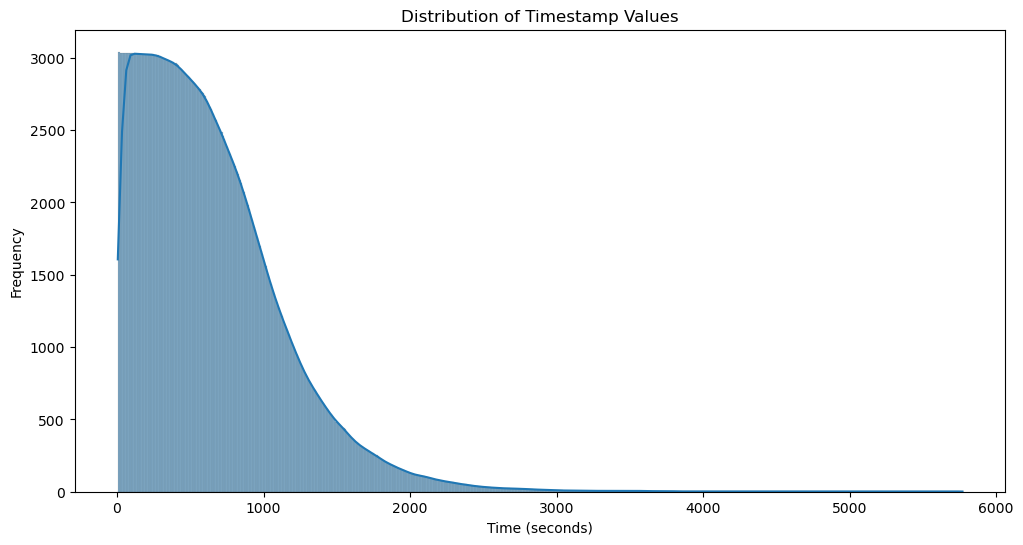


Timestamp value statistics:
count    664398.000000
mean        650.706956
std         502.615702
min           5.000000
25%         275.000000
50%         560.000000
75%         905.000000
max        5770.000000
dtype: float64


In [54]:
## Distribution des timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Extract timestamps from Moves list in formatted data
all_timestamps = []

for moves in df_train['Moves']:
    timestamps = [int(x[1:]) for x in moves if isinstance(x, str) and x.startswith('t') and x[1:].isdigit()]
    all_timestamps.extend(timestamps)

# Convert to pandas Series for analysis
timestamp_series = pd.Series(all_timestamps)
max_times = timestamp_series.max()
bin_edges = np.arange(0, max_times + 5, 5)

# Create distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=timestamp_series, bins=bin_edges, kde=True)
plt.title('Distribution of Timestamp Values')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print("\nTimestamp value statistics:")
print(timestamp_series.describe())


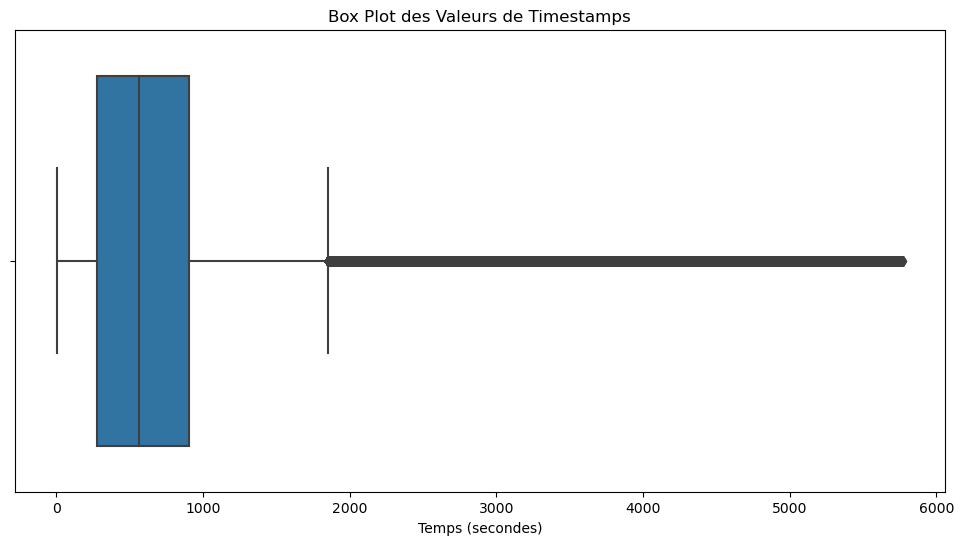

In [52]:
# Boxplot des timestamp pour visualiser les outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=timestamp_series)
plt.title('Box Plot des Valeurs de Timestamps')
plt.xlabel('Temps (secondes)')
plt.show()

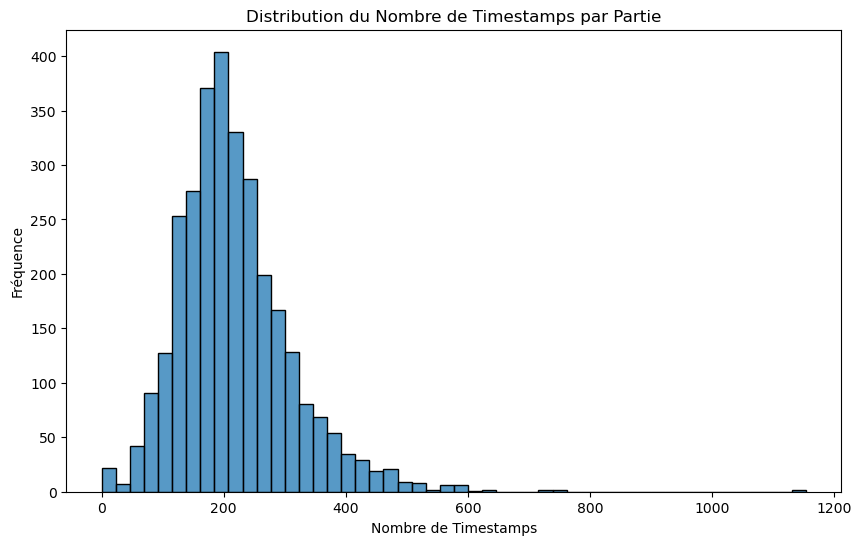


Statistiques du nombre de timestamps:
count    3052.000000
mean      217.692661
std        95.167388
min         0.000000
25%       157.000000
50%       204.000000
75%       262.000000
max      1154.000000
dtype: float64


In [57]:
## Distribution du nombre de timestamps par joueurs

import matplotlib.pyplot as plt
import seaborn as sns

# Compte le nombre de timestamps par ligne
timestamp_counts = features_train.apply(
    lambda row: sum(1 for x in row if isinstance(x, str) and x.startswith('t')), 
    axis=1
)

# Crée le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=timestamp_counts, bins=50)
plt.title('Distribution du Nombre de Timestamps par Partie')
plt.xlabel('Nombre de Timestamps')
plt.ylabel('Fréquence')
plt.show()

# Affiche les statistiques récapitulatives
print("\nStatistiques du nombre de timestamps:")
print(timestamp_counts.describe())


In [18]:
# Trouver les lignes sans timestamps

# Définir un seuil pour les parties anormales (par exemple, moins de 0 ou timestamps)
seuil_parties_anormales = 0

# Filtrer les parties anormales
parties_anormales = features_train[timestamp_counts <= seuil_parties_anormales]

# Afficher les 10 premières parties anormales
print(f"Affichage des {min(10, len(parties_anormales))} premières parties anormales (≤ {seuil_parties_anormales} timestamps):")
print(parties_anormales.head(10))

# Afficher le nombre total de parties anormales
print(f"\nNombre total de parties anormales : {len(parties_anormales)}")

# Optionnel : afficher les statistiques des parties anormales
print("\nStatistiques des parties anormales:")
print(timestamp_counts[timestamp_counts <= seuil_parties_anormales].describe())
print("-------------------------------------------------------")
print(features_train[timestamp_counts == 1]) # une seule ligne avec une timestamp: ligne 45


Affichage des 10 premières parties anormales (≤ 0 timestamps):
                                           battleneturl played_race     0  \
46    http://eu.battle.net/sc2/en/profile/3538115/1/...        Zerg  Base   
577   http://us.battle.net/sc2/en/profile/3202227/1/...        Zerg   NaN   
578   http://us.battle.net/sc2/en/profile/2553612/1/...     Protoss   NaN   
671   http://us.battle.net/sc2/en/profile/5376901/1/...        Zerg   NaN   
672   http://us.battle.net/sc2/en/profile/3985949/1/...      Terran   NaN   
678   http://us.battle.net/sc2/en/profile/4589387/1/...        Zerg   NaN   
679   http://us.battle.net/sc2/en/profile/3985949/1/...      Terran   NaN   
1883  http://us.battle.net/sc2/en/profile/3949344/1/...      Terran   NaN   
1884  http://us.battle.net/sc2/en/profile/3650249/1/...     Protoss   NaN   
3011  http://xx.battle.net/sc2/en/profile/401/1/Soul...        Zerg     s   

        1    2     3         4         5    6         7  ... 10527 10528  \
46      s    

In [19]:
# Sélectionner la ligne d'indice 45
row = features_train.iloc[45]

# Trouver la colonne contenant une valeur txx
timestamp_column = next((col for col, val in row.items() if isinstance(val, str) and val.startswith('t')), None)

if timestamp_column:
    print(f"Colonne contenant le timestamp : {timestamp_column}")
    print(f"Valeur du timestamp : {row[timestamp_column]}")
else:
    print("Aucune colonne contenant un timestamp trouvée dans cette ligne.")


Colonne contenant le timestamp : 13
Valeur du timestamp : t5


In [20]:
from typing import List
import pandas as pd

def check_timestamps(actions: List[str]) -> bool:
    """
    Vérifie si la séquence de timestamps dans les actions est valide.
    
    Critères de validité :
    - Doit commencer par t5
    - Doit s'incrémenter de 5 à chaque fois (t5, t10, t15, etc.)
    - Le dernier timestamp doit être entre 250 et 4000
    
    Args:
        actions: Liste d'actions incluant les timestamps
        
    Returns:
        bool: True si la séquence est valide, False sinon
    """
    timestamps = [action for action in actions if isinstance(action, str) and action.startswith('t')]
    
    if not timestamps or timestamps[0] != 't5':
        return False
    
    for i in range(1, len(timestamps)):
        prev_time = int(timestamps[i-1][1:])
        curr_time = int(timestamps[i][1:])
        if curr_time != prev_time + 5:
            return False
    
    last_time = int(timestamps[-1][1:])
    return 50 <= last_time <= 6000 # 250, 4000

def validate_game_sequence(row):
    """Valide une séquence de jeu unique du DataFrame"""
    actions = [x for x in row if pd.notna(x)]
    return check_timestamps(actions)

# Application au DataFrame train
valid_sequences_train = features_train.apply(validate_game_sequence, axis=1)
print(f"Séquences valides train: {valid_sequences_train.sum()}/{len(features_train)} ({valid_sequences_train.mean()*100:.2f}%)")

# Affichage des séquences invalides
invalid_sequences_train = features_train[~valid_sequences_train]
print("---------------------------------------------------------------------")
# print("sequences invalides: ")
# print(invalid_sequences)


# Pas de cleaning pour le DataFrame test



Séquences valides train: 3034/3052 (99.41%)
---------------------------------------------------------------------


In [21]:
# Afficher le DataFrame nettoyé
cleaned_features_train = features_train[valid_sequences_train]
print("\nDataFrame nettoyé (lignes valides) :")
print(cleaned_features_train.head())
print(cleaned_features_train.shape)


DataFrame nettoyé (lignes valides) :
                                        battleneturl played_race     0     1  \
0  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
1  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss     s  Base   
2  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
3  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss  Base     s   
4  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   

   2     3     4  5         6         7  ... 10527 10528 10529 10530 10531  \
0  s     s     s  s        t5      Base  ...   NaN   NaN   NaN   NaN   NaN   
1  s     s  Base  s         s      Base  ...   NaN   NaN   NaN   NaN   NaN   
2  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   
3  s  Base     s  s         s        t5  ...   NaN   NaN   NaN   NaN   NaN   
4  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   

  10532 1053

### Getting features...

Building a mini framework to read our Dataframe and convert it to features.

Now we will create features out of the dataset.

FeaturesGetter iterates over an ActionsDataLoader (yield every actions between two 't[xx]') and apply a set of Feature contained in a FeaturePool. At the end, it gets metrics over the values registered by each features in the feature pool.

In [22]:
class CancelBatchException(Exception):
    """Used to cancel processing of a batch of data (when the keystroke sequence is fully read)"""

In [23]:
class Feature:
    def __init__(
        self, name: str, 
        lambda_: Callable[[List[str]], Union[int, float]]=None, 
        val_count: int=None, 
        max_iter: int=None, 
        predicate: Callable[[List[str]], bool]=None, 
        metric: Callable[[List[str]], Union[int, float]]=mean, 
        div: bool=True
    ):
        """If neither lambda_, val_count nor predicate are defined, the _lambda will just be the length of the given action range.

        Args:
            name (str): feature name
            lambda_ (Callable[[List[str]], Union[int, float]], optional): 
                lambda that'll be applied to compute metric value over action ranges. Defaults to None.
            val_count (int, optional): set feature's lambda to be the count of this value (if lambda_ is None). Defaults to None.
            max_iter (int, optional): when exceeding this iteration, the feature will no longer be computed. Defaults to None.
            predicate (Callable[[List[str]], bool], optional): define a predicate to compute lambda across one 
                action range (if lambda_ and val_count is None). Defaults to None.
            metric (Callable[[List[str]], Union[int, float]], optional): the metric used to aggregate feature's 
                values across all ranges. Defaults to mean.
            div (bool, optional): whether to divide the aggregated metric value. Defaults to True.
        """
        self.name, self.metric, self.max_iter, self.div = name, metric, max_iter, div
        self.reset()
        self._lambda: Callable[[List[str]], Union[int, float]]
        if   lambda_   is not None: 
            self._lambda = lambda_
        elif val_count is not None: 
            self._lambda = lambda x: x.count(val_count)
        elif predicate is not None: 
            self._lambda = lambda x: sum(1 for o in x if predicate(o))
        else: 
            self._lambda = lambda x: len(x)
    
    def reset(self):
        """Resets the value of the feature
        """
        self.vals: List[Union[int, float]] = []
        self.val, self.i = 0, 0
        
    def __call__(self, rng: List[str], *args):
        """Compute feature's value according to _lambda, for given action range. Extra *args are given to _lambda

        Args:
            rng (List[str]): range of action (given by ActionDataLoader)
        """
        if self.max_iter is None or self.i < self.max_iter:
            self.val = self._lambda(rng, *args)
            self.vals.append(self.val)
            self.i += 1
            
    @property
    def value(self) -> int | float:
        """Returns:
            int | float: the aggregated feature's value across all action ranges read until now
        """
        return self.metric(self.vals)

In [24]:
class ActionsDataLoader:
    """Iterates over two 'tXX', yielding actions between each time steps
    """
    def __init__(self, actions: pd.DataFrame, do_range: bool = True, max_t: Optional[int]=None):
        """Args:
            actions (List[Feature]): The raw dataframe
            do_range (bool): whether the data loader should iterate and yield each range 
                between two 'tXX', or just yield the whole sequence once then return. Defaults to True.
            max_t (Optional[int], optional): the t max to stop yielding. Defaults to None.
        """
        self.t_indx = [0] + [j for j, val in enumerate(actions) if isinstance(val, str) and val[0] == "t"]
        self.do_range = do_range
        if max_t and max_t < len(self.t_indx):
            self.t_indx = self.t_indx[:max_t]
            self.values = actions.values[: self.t_indx[max_t - 1]]
        else: 
            self.values = actions.values
        self.n_t = len(self.t_indx)
    
    def __len__(self): return 1 if self.do_range else (self.n_t or 1)
    
    def __iter__(self):
        if self.n_t == 0 or not self.do_range:
            self.start_indx = 0
            self.end_indx = self._get_first_nan_indx()
            yield self.values[self.start_indx:self.end_indx].tolist()
            return 
        for self.i in range(self.n_t):
            try:
                self._get_actions_range()
                yield self.values[self.start_indx:self.end_indx].tolist()
            except CancelBatchException: 
                return

    def _get_actions_range(self):
        """Computes the action range until a 'tXX' is met. If there are no more 'tXX', 
            it means we reached the end of the game, and the sequences finish with NaN 
            (or for the longest game, the full row is read).

        Raises:
            CancelBatchException: indicates that there is no more action to be read (next action is NaN).
        """
        self.start_indx = self.t_indx[self.i] + (1 if self.i >0 else 0)
        if  self.start_indx >= len(self.values) or pd.isna(self.values[self.start_indx]): 
            raise CancelBatchException
        self.end_indx = self.t_indx[self.i + 1] if (self.i + 1) < self.n_t else self._get_first_nan_indx()
    
    def _get_first_nan_indx(self) -> int:
        """Returns:
            int: the first index in values that is not NaN
        """
        nans = np.argwhere(pd.isna(self.values[self.start_indx:]))
        return len(self.values) if len(nans) == 0 else nans[0][0]
    
    def get_max_t(self):
        """Gets the last 'tXX' defined. If this data loader was defined with max_t not None, it returns this max_t
        """
        if self.n_t - 1 == 0:
            return 0
        return int(self.values[self.t_indx[self.n_t - 1]][1:]) if self.n_t > 0 else 0

In [25]:
class FeaturesGetter:
    def __init__(self, features: List[Feature], n_rows: int=3052, log: bool=False, **kwargs_dataloader):
        """Args:
            features (List[Feature]): the list of features to compute
            n_rows (int, optional): the number of row (used only in log). Defaults to 3052.
            log (bool, optional): whether to output log information when processing the df. Defaults to False.

            Accepts extra kwargs_dataloader that'll be passed to the dataloader
        """
        self.feature_pool, self.n_rows, self.log, self.kwargs_dataloader = features, n_rows, log, kwargs_dataloader
        self.game_l: int # game length
        self.reset()
        
    def reset(self):
        """Resets the value of each feature in the feature pool"""
        for feature in self.feature_pool: 
            feature.reset()
        self.game_l = 0
    
    def _log(self):
        """Print to stdout the current % of the df that have been processed"""
        global cnt
        cnt += 1
        print(f"{cnt * 100 / self.n_rows:.2f} %", end="\r")
    
    def _one_update(self):
        """Compute each feature's value for one batch (one action range yielded by the ActionDataLoader)"""
        for feature in self.feature_pool: 
            feature(self.actions_rng)
        
    def __call__(self, actions: pd.DataFrame) -> pd.Series:
        """Computes all features' values for each of the given actions, iterating over ADL with parameters defined in __init__
        
        Returns:
            pd.Series: the features' values as a Series. 
                Adds an extra feature which is the game length is max_t is not in __init__ kwargs
        """
        self.reset()
        if self.log:
            self._log()
        adl = ActionsDataLoader(actions, **self.kwargs_dataloader)
        for self.actions_rng in adl:
            self._one_update()
        activs = [f.value / len(adl) if f.div else f.value for f in self.feature_pool]
        self.game_l = (max_t := self.kwargs_dataloader.get("max_t", None)) or adl.get_max_t()
        return pd.Series( activs + ([self.game_l] if max_t is None else []) )

Defining lambdas to convert dataset to features
We create basic features, corresponding to the mean of each action played per timestamp plus the mean of all actions together

In [26]:
FEATURES_NAMES = ["s_mean", "base_mean", "mineral_mean", "hotkeys_mean", "actions_mean"]
ACTIONS = [ "s", "Base", "SingleMineral", "hotkey" ]

def get_base_features() -> List[Feature]:
    """Defines base features (mean of count of each action / hotkeys)
    """
    features = []
    for i, action in enumerate(ACTIONS[:-1]):
        features.append(Feature(FEATURES_NAMES[i], val_count=action))
    features.append(Feature(FEATURES_NAMES[-2], predicate=lambda x: x.startswith(ACTIONS[-1]))) # hotkeys
    features.append(Feature(FEATURES_NAMES[-1])) # all actions combined (no lambda_ means lambda_ is just the length)
    for i, j in product(range(10), range(3)):
        pass
    #TODO
        # OTHER FEATURES HERE
    # OTHER FEATURES HERE
    # Guess what would be useful ?
    # set div, metric and lambda_ accordingly
    return features

# Avec ces features de base f1 à 0.33 et accuracy à 0.35

In [27]:
### Features v2
from itertools import product
from collections import Counter
import numpy as np

def get_base_features() -> List[Feature]:
    """Defines base features and additional features to better identify players"""
    features = []
    
    # Base features
    for i, action in enumerate(ACTIONS[:-1]):
        features.append(Feature(FEATURES_NAMES[i], val_count=action))
    features.append(Feature(FEATURES_NAMES[-2], predicate=lambda x: x.startswith(ACTIONS[-1]))) # hotkeys
    features.append(Feature(FEATURES_NAMES[-1])) # all actions combined (no lambda_ means lambda_ is just the length)
    
    # APM (Actions Per Minute)
    # features.append(Feature("apm", lambda x: len(x) / (int(x[-1][1:]) / 60) if x and x[-1].startswith('t') else 0, div=False))
    
    # Hotkey, base, s, mineral usage ratio
    features.append(Feature("hotkey_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('hotkey')) / len(x) if x else 0, div=False))
    features.append(Feature("Base_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('Base')) / len(x) if x else 0, div=False))
    features.append(Feature("s_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('s')) / len(x) if x else 0, div=False))
    features.append(Feature("mineral_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('SingleMineral')) / len(x) if x else 0, div=False))
    
    # Action variety
    features.append(Feature("action_variety", lambda x: len(set(x)) / len(x) if x else 0, div=False))
    
    # Economic vs Military actions ratio
    def eco_military_ratio(x):
        if not x:
            return 0
        eco = sum(1 for action in x if isinstance(action, str) and action in ['Base', 'SingleMineral'])
        military = sum(1 for action in x if isinstance(action, str) and action not in ['Base', 'SingleMineral', 's'] and not action.startswith('t'))
        return eco / (military + 1e-5)
    features.append(Feature("eco_military_ratio", eco_military_ratio, div=False))
    
    # Action change frequency
    def action_change_frequency(x):
        if not x:
            return 0
        changes = sum(1 for i in range(1, len(x)) if x[i] != x[i-1])
        return changes / len(x)
    features.append(Feature("action_change_frequency", action_change_frequency, div=False))
    
    # Specific hotkey usage
    for i in range(10):
        features.append(Feature(f"hotkey{i}_usage", lambda x, i=i: sum(1 for action in x if isinstance(action, str) and action.startswith(f'hotkey{i}'))))
    
    # Average time between actions
    # def avg_time_between_actions(x):
    #     times = [int(action[1:]) for action in x if isinstance(action, str) and action.startswith('t')]
    #     return np.mean(np.diff(times)) if len(times) > 1 else 0
    # features.append(Feature("avg_time_between_actions", avg_time_between_actions, div=False))
    
    return features


In [28]:
### Features v3
# Add specific hotkey usage
from itertools import product
from collections import Counter
import numpy as np

def get_base_features() -> List[Feature]:
    """Defines base features and additional features to better identify players"""
    features = []
    
    # Base features
    for i, action in enumerate(ACTIONS[:-1]):
        features.append(Feature(FEATURES_NAMES[i], val_count=action))
    features.append(Feature(FEATURES_NAMES[-2], predicate=lambda x: x.startswith(ACTIONS[-1]))) # hotkeys
    features.append(Feature(FEATURES_NAMES[-1])) # all actions combined (no lambda_ means lambda_ is just the length)
    
    
    # Hotkey usage ratio
    features.append(Feature("hotkey_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('hotkey')) / len(x) if x else 0, div=False))
    features.append(Feature("Base_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('Base')) / len(x) if x else 0, div=False))
    features.append(Feature("s_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('s')) / len(x) if x else 0, div=False))
    features.append(Feature("mineral_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('SingleMineral')) / len(x) if x else 0, div=False))
    
    
    # Action variety
    features.append(Feature("action_variety", lambda x: len(set(x)) / len(x) if x else 0, div=False))
    
    # Hotkey vs Normal actions ratio
    def normal_hotkey_ratio(x):
        if not x:
            return 0
        hotkeys = sum(1 for action in x if isinstance(action, str) and action.startswith('t'))
        normal = sum(1 for action in x if isinstance(action, str) and not action.startswith('t'))
        return eco / (military + 1e-5)
    features.append(Feature("normal_hotkey_ratio", normal_hotkey_ratio, div=False))
    
    # Action change frequency
    def action_change_frequency(x):
        if not x:
            return 0
        changes = sum(1 for i in range(1, len(x)) if x[i] != x[i-1])
        return changes / len(x)
    features.append(Feature("action_change_frequency", action_change_frequency, div=False))
    
    # Specific hotkey usage
    for i in range(10):
        features.append(Feature(f"hotkey{i}_usage", lambda x, i=i: sum(1 for action in x if isinstance(action, str) and action.startswith(f'hotkey{i}'))))
    
    
    # New Features: Ones Digit of Hotkeys
    for digit in range(10):
        for value in range(3):  # 0=created, 1=updated, 2=used
            def hotkey_digit_value_ratio(x, digit=digit, value=value):
                if not x:
                    return 0
                hotkeys = [action for action in x if isinstance(action, str) and action.startswith('hotkey')]
                count = sum(1 for hotkey in hotkeys if int(hotkey[-2]) == digit and int(hotkey[-1]) == value)
                return count / len(hotkeys) if hotkeys else 0
            features.append(Feature(f"hotkey{digit}_value{value}_ratio", hotkey_digit_value_ratio, div=False))
    
    return features


Now it's ready to be put into a function that'll get all the features from the initial dataframe and return a new dataframe containing only those features. FeaturesGetter gets one extra feature from that we created, which is max_time, corresponding to the "xx" of the last "txx" seen.

In [29]:
features_getter = None
def create_features(
    df: pd.DataFrame, 
    min_: int, 
    max_: int, 
    drop: bool=False, 
    features: List[Feature]=get_base_features(), 
    **kwargs
) -> pd.DataFrame:
    """Compute features on given dataframe

    Args:
        df (pd.DataFrame)
        min_ (int): index of the first action to pass to the feature
        max_ (int): index of the last action to pass to the feature
        drop (bool, optional): whether to drop original columns of the dataframe. Defaults to False.
        features (List[Feature], optional). Defaults to get_base_features().

    Returns:
        pd.DataFrame: a dataframe containing features' values for each row
    """
    global features_getter
    features_getter = FeaturesGetter(features, **kwargs)
    final_df = df.loc[:,min_:max_].apply(features_getter, axis=1, result_type='expand')
    final_df.columns = [f.name for f in features_getter.feature_pool] + (["max_time"] if not kwargs.get("max_t") else [])
    if drop:
        df = df.drop(columns=[i for i in range(min_, max_ + 1)])
    final_df = pd.concat([df, final_df], axis=1)
    features_getter.reset()
    return final_df

### Handling string
The race_played column can only take three values; instead of converting it to categorical as we did with our dependent variable, we will instead convert it to dummy variables: we one-hot encode each race. It will not add many columns to our dataframe (only three) but will allow the decision trees to split much faster on the race (on only one binary split).

In [30]:
def get_dummies(df: pd.DataFrame):
    """Converts textual columns to one-hot encoded vectors (one column per possible value)"""
    df = pd.get_dummies(df, columns=["played_race"])
    return df

Function preprocess creates a pipeline of all the function we just implemented: it create the features, converts the race to dummy variables and the dependent variable to category codes.

In [31]:
def preprocess(df: pd.DataFrame, min_: int, max_: int, is_train: bool=True, convert_race: bool=True, **kwargs):
    """Calls FeatureGetter on the dataframe, applying preprocessing steps before
    Args:
        df (pd.DataFrame)
        min_ (int)
        max_ (int)
        is_train (bool, optional): whether the current dataframe contains training data 
            (to preprocess dependent variable or not). Defaults to True.
        convert_race (bool, optional): whether to convert race attribute to dummies. Defaults to True.

    Returns:
        _type_: _description_
    """
    df = create_features(df, min_, max_, **kwargs)
    if convert_race: 
        df = get_dummies(df)
    df.columns = df.columns.astype(str)
    if is_train:
        url_code_matching = to_categories(df)
        return (df, url_code_matching)
    return df

In [32]:
%%time
cnt=0
(processed_train_df, url_code_matching) = preprocess(cleaned_features_train, 0, cleaned_features_train.shape[1]-3, drop=True, n_rows=3020, log=True) 
processed_train_df.head()

CPU times: total: 1min 19s
Wall time: 1min 21s


,battleneturl,s_mean,base_mean,mineral_mean,hotkeys_mean,actions_mean,hotkey_ratio,Base_ratio,s_ratio,mineral_ratio,...,hotkey8_value0_ratio,hotkey8_value1_ratio,hotkey8_value2_ratio,hotkey9_value0_ratio,hotkey9_value1_ratio,hotkey9_value2_ratio,max_time,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,2.036254,0.199396,0.015106,4.492447,6.743202,0.660472,0.017780,0.283678,0.001816,...,0.000000,0.0,0.000000,0.002392,0.0,0.000000,1655.0,True,False,False
1,29,1.620482,0.036145,0.000000,4.596386,6.253012,0.709817,0.005881,0.260205,0.000000,...,0.000602,0.0,0.010194,0.000602,0.0,0.010874,1655.0,True,False,False
2,53,2.128713,0.232673,0.014851,4.297030,6.673267,0.647709,0.022472,0.298835,0.001281,...,0.000000,0.0,0.000000,0.001697,0.0,0.002063,1010.0,True,False,False
3,29,1.965347,0.103960,0.000000,4.787129,6.856436,0.699131,0.013035,0.282883,0.000000,...,0.000000,0.0,0.000000,0.001238,0.0,0.014299,1005.0,True,False,False
4,53,1.925926,0.018519,0.000000,3.787037,5.731481,0.669150,0.002315,0.310016,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,540.0,True,False,False


In [33]:
url_code_matching[53]

'http://eu.battle.net/sc2/en/profile/4234852/1/First/'

In [34]:
processed_train_df.shape

(3034, 57)

In [35]:
%%time
cnt=0
processed_test_df = preprocess(features_test, 0, features_test.shape[1]-3, is_train=False, drop=True, n_rows=340, log=True)

print("after process")
processed_test_df.head()

after process
CPU times: total: 8.36 s
Wall time: 8.64 s


,6816,s_mean,base_mean,mineral_mean,hotkeys_mean,actions_mean,hotkey_ratio,Base_ratio,s_ratio,mineral_ratio,...,hotkey8_value0_ratio,hotkey8_value1_ratio,hotkey8_value2_ratio,hotkey9_value0_ratio,hotkey9_value1_ratio,hotkey9_value2_ratio,max_time,played_race_Protoss,played_race_Terran,played_race_Zerg
0,NaN,4.784091,0.107955,0.017045,13.585227,18.494318,0.716101,0.006326,0.265592,0.000618,...,0.000000,0.0,0.000000,0.003220,0.0,0.014125,875.0,False,False,True
1,NaN,2.868687,0.000000,0.000000,8.277778,11.146465,0.664641,0.000000,0.320207,0.000000,...,0.000000,0.0,0.000000,0.000297,0.0,0.035519,985.0,False,True,False
2,NaN,2.297521,0.082645,0.000000,12.070248,14.450413,0.818070,0.005846,0.176084,0.000000,...,0.002045,0.0,0.021781,0.000000,0.0,0.000000,1210.0,True,False,False
3,NaN,5.401361,0.057823,0.006803,4.785714,10.251701,0.452230,0.006206,0.520448,0.000709,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1470.0,False,False,True
4,NaN,1.787879,0.159091,0.000000,2.083333,4.030303,0.526587,0.032363,0.395595,0.000000,...,0.015152,0.0,0.001894,0.000000,0.0,0.000000,660.0,True,False,False


In [36]:
## Drop columns
processed_train_df = processed_train_df.drop(columns=['max_time'])
processed_test_df = processed_test_df.drop(columns=['max_time'])

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(probability=True, kernel='sigmoid')
decision_tree = DecisionTreeClassifier(max_depth=29) #27 features => 13=27/2, 58 features => 58/2=29

def train_model(X_train, y_train):
    # model = RandomForestClassifier(n_estimators=116, random_state=42, max_features=None, max_depth=29)
    # model = AdaBoostClassifier( estimator = svc, algorithm='SAMME',  n_estimators=27, learning_rate=0.3, random_state=42)
    model = AdaBoostClassifier( estimator = decision_tree, algorithm='SAMME',  n_estimators=116, learning_rate=1.3, random_state=42)
    model.fit(X_train, y_train)
    return model

def make_predictions(model, X):
    return model.predict(X)

def calculate_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted') # [None, 'micro', 'macro', 'weighted'].


## random forest classique
model = RandomForestClassifier(n_estimators=100, random_state=50, max_features=None)
scores validation : 0.87 et 0.88 mais 0.78 sur kaggle donc overfit

## Changement de model vers Adaboost

AdaBoost construit ses arbres séquentiellement, chaque nouvel arbre se concentrant sur les erreurs des précédents.
Random Forest construit ses arbres indépendamment et en parallèle.

AdaBoost attribue des poids différents aux arbres en fonction de leur performance.
Random Forest donne un poids égal à tous les arbres pour la décision finale.

Conclusion : Adaboost apprend des erreurs et modifie

### base_estimator svc
en utilisant les mêmes attributs que pour base_estimator decision tree
kernel linear: prend du temps à entraîner(5min pour 27 estimateurs, 12min pour 54) pour un score de 0.02 et 0.03 pour 27, et 0.01 et 0.02 pour 54
kernel 'rbf' (Radial Basis Function)=> Noyau gaussien(transforme l'espace en utilisant une fonction gaussienne) : pas ouf
kernel 'poly' : pas ouf
kernel 'sigmoid': pas ouf

### base_estimator decision_tree
j'ai essayé Adaboost classifier avec nos 27 features avec decision tree comme base_estimator
j'ai joué avec un learning rate compris dans [0.1, 1], 0.3 est le meilleur
max_depth = nb features / 2
random state 42
n_estimators = 27*2=54
split train, validation : 0.2

scores validation : 0.84 et 0.85 et 0.82 sur kaggle

## Essaie de Random forest avec les mêmes valeurs trouvées pour Adaboost
change les valeurs de n_estimators, random_state, max_features; et ajout de max_depth=13
scores : 0.79 et 0.81

## Tests avec les features ajoutés par Yikang

58 features
changer le max depth et n_estimators
Adaboost score: 0.80
RandomForest score: 0.86 0.87
model = RandomForestClassifier(n_estimators=116, random_state=42, max_features=None, max_depth=29)

## Essaie avec le dataset long

In [38]:
# Fine Tuning
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 


In [39]:
# Fine Tuning
processed_train_df['battleneturl'].value_counts()

battleneturl
131    58
86     51
73     50
49     43
66     42
       ..
139     4
36      4
132     4
56      4
192     4
Name: count, Length: 200, dtype: int64

In [40]:
# Fine Tuning
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 

In [41]:
# Diviser les données en ensembles d'entraînement et de validation
X = processed_train_df.drop(columns=['battleneturl'])
y = processed_train_df['battleneturl']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = train_model(X_train, y_train)

In [42]:
# Fine Tuning
# grid_search = GridSearchCV(RandomForestClassifier(), 
# 						param_grid=param_grid) 
# grid_search.fit(X_train, y_train) 
# print(grid_search.best_estimator_)

# Prend trop de temps et ma machine n'a pas de GPU

In [43]:
feature_names = X.columns.to_list()
print(feature_names)

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

['s_mean', 'base_mean', 'mineral_mean', 'hotkeys_mean', 'actions_mean', 'hotkey_ratio', 'Base_ratio', 's_ratio', 'mineral_ratio', 'action_variety', 'eco_military_ratio', 'action_change_frequency', 'hotkey0_usage', 'hotkey1_usage', 'hotkey2_usage', 'hotkey3_usage', 'hotkey4_usage', 'hotkey5_usage', 'hotkey6_usage', 'hotkey7_usage', 'hotkey8_usage', 'hotkey9_usage', 'hotkey0_value0_ratio', 'hotkey0_value1_ratio', 'hotkey0_value2_ratio', 'hotkey1_value0_ratio', 'hotkey1_value1_ratio', 'hotkey1_value2_ratio', 'hotkey2_value0_ratio', 'hotkey2_value1_ratio', 'hotkey2_value2_ratio', 'hotkey3_value0_ratio', 'hotkey3_value1_ratio', 'hotkey3_value2_ratio', 'hotkey4_value0_ratio', 'hotkey4_value1_ratio', 'hotkey4_value2_ratio', 'hotkey5_value0_ratio', 'hotkey5_value1_ratio', 'hotkey5_value2_ratio', 'hotkey6_value0_ratio', 'hotkey6_value1_ratio', 'hotkey6_value2_ratio', 'hotkey7_value0_ratio', 'hotkey7_value1_ratio', 'hotkey7_value2_ratio', 'hotkey8_value0_ratio', 'hotkey8_value1_ratio', 'hotkey8_

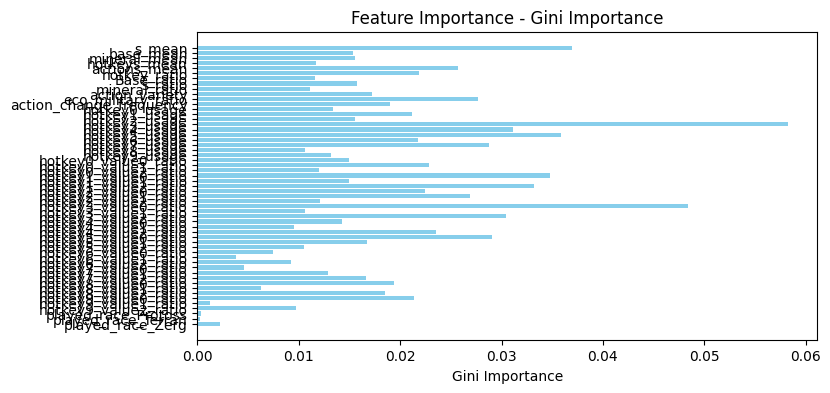

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [45]:
# Faire des prédictions sur l'ensemble de validation
val_predictions = make_predictions(model, X_val)

# Calculer le F1-score sur l'ensemble de validation
f1 = calculate_f1_score(y_val, val_predictions)
print(f"F1-score sur l'ensemble de validation : {f1:.2f}")

accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy sur l'ensemble de validation : {accuracy:.2f}")

F1-score sur l'ensemble de validation : 0.87
Accuracy sur l'ensemble de validation : 0.88


In [46]:
# Préparer les données de test
test_df = processed_test_df.drop(columns=[processed_test_df.columns[0], '6816'])

# Faire des prédictions
test_predictions = make_predictions(model, test_df)

# Convertir les codes prédits en URLs
url_predictions = [url_code_matching[code] for code in test_predictions]

# Créer un DataFrame pour sauvegarder les résultats
results_df = pd.DataFrame({
    'RowId': range(1, len(url_predictions) + 1),
    'prediction': url_predictions
})

# Sauvegarder les résultats
# results_df.to_csv('predictions.csv', index=False)
# print("Les prédictions ont été sauvegardées dans 'predictions.csv'.")
# Penser à supprimer la ligne de trop sur le csv